# Gestión riesgos de las carteras


La gestión del **riesgo de cartera** es el proceso de identificar, evaluar y mitigar los diversos riesgos asociados con una cartera de inversiones.

Implica implementar estrategias para optimizar el equilibrio entre riesgo y retorno, asegurando que la cartera se alinee con los **objetivos financieros y la tolerancia al riesgo del inversor**. 

Una gestión de riesgos efectiva ayuda a minimizar las pérdidas potenciales, optimizar los retornos y mejorar el rendimiento de la inversión a largo plazo.

La gestión del riesgo de cartera es esencial para optimizar el rendimiento y proteger las inversiones.

Implica la identificación y evaluación de riesgos, la implementación de estrategias de mitigación y la monitoriazción continua.

Herramientas como el valor en riesgo, la desviación estándar y la beta son fundamentales en este proceso.

Estrategias como la diversificación y el reequilibrio ayudan a minimizar el impacto de los riesgos.

Una gestión efectiva del riesgo permite ajustes informados, contribuyendo a la estabilidad y crecimiento de la cartera a largo plazo.

### Componentes clave de la gestión del riesgo de cartera:

1. **Identificación de Riesgos:** Implica reconocer los diversos riesgos asociados con una cartera de inversiones, incluidos los relacionados con activos específicos, sectores o estrategias de inversión.

2. **Evaluación y Medición de Riesgos:** Involucra cuantificar el impacto potencial de los riesgos identificados en el desempeño de la cartera de inversiones. Este paso utiliza diversas herramientas y métricas, como el valor en riesgo (VaR), la desviación estándar y la beta.

3. **Estrategias de Mitigación de Riesgos:** Implica implementar tácticas para reducir el impacto potencial de los riesgos identificados en la cartera. Estas estrategias pueden incluir diversificación, ajustes en la asignación de activos, cobertura y reequilibrio.

4. **Monitoreo y Revisión de Riesgos:** Involucra la evaluación continua y la valoración del perfil de riesgo de la cartera y la efectividad de las estrategias de gestión de riesgos implementadas. Las revisiones regulares de la cartera ayudan a los inversores a tomar decisiones informadas y ajustar sus estrategias según sea necesario.


### Estrategias clave para la gestión del riesgo en carteras:

- **Diversificación:** Repartir inversiones en diferentes clases de activos y regiones para minimizar el impacto de riesgos específicos.
- **Asignación de Activos:** Determinar la combinación óptima de activos basada en la tolerancia al riesgo y objetivos del inversor.
- **Reequilibrio:** Ajustar la asignación de activos para mantener el nivel de riesgo deseado.
- **Cobertura:** Usar instrumentos financieros para reducir o compensar el riesgo de movimientos de precios adversos.
- **Retornos Ajustados por Riesgo:** Evaluar el rendimiento considerando el retorno y el riesgo, para tomar decisiones informadas.
- **Pruebas de Estrés y Análisis de Escenarios:** Evaluar el impacto de condiciones de mercado adversas en la cartera para identificar y ajustar vulnerabilidades.
- **Uso de Derivados y Productos Estructurados:** Emplear estos instrumentos para gestionar el riesgo, limitando las pérdidas potenciales.

Estas estrategias ayudan a optimizar el equilibrio entre riesgo y retorno, protegiendo y potenciando el valor de la cartera a largo plazo.


En este notebook vamos a analizar distintas maneras de medir el riesgo de un activo o cartera.

La medición del riesgo de un activo o cartera se enfoca en analizar las colas de la distribución de retornos, destacando los resultados extremos tanto positivos como negativos.

Este análisis permite evaluar la probabilidad e impacto de eventos de mercado inusuales, más allá de lo que indican medidas tradicionales como la volatilidad.

Al entender estos extremos, los inversores pueden diseñar estrategias de mitigación más efectivas, preparándose para escenarios de alto riesgo y protegiendo mejor sus inversiones contra sorpresas adversas.

Las principales medidas o ratios que vamos a usar son:

- Volatilidad
- Ratio de sharpe
- Ratio de Infomación
- Ratio de Treinor
- Ratio de Sortino
- Máximo Drawdown
- Tiempo de recuperación
- Ratio de Calmar
- Bull Beta
- Bear Beta


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# print(plt.style.available) #list of available styles
plt.style.use('ggplot')

In [4]:
data_OHLC_df = pd.read_excel('../data/data_OHLC.xlsx', header=[0, 1], index_col=0, parse_dates=True)
data_close_df = data_OHLC_df['Adj Close'].dropna()
ret_close_df = np.log(data_close_df).diff().dropna()

Text(0.5, 1.0, 'Volatilidad')

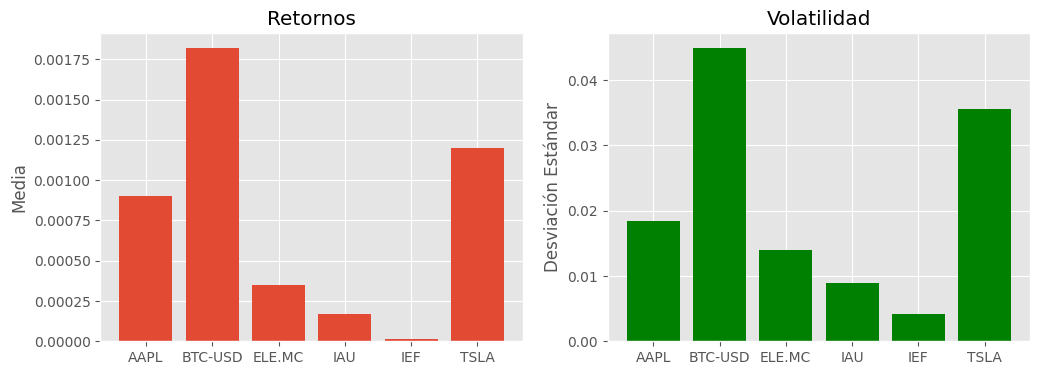

In [13]:
means = ret_close_df.mean()
stds = ret_close_df.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')



In [15]:
rte_close_df = ret_close_df.loc[:, ['BTC-USD', 'TSLA', 'IEF']]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

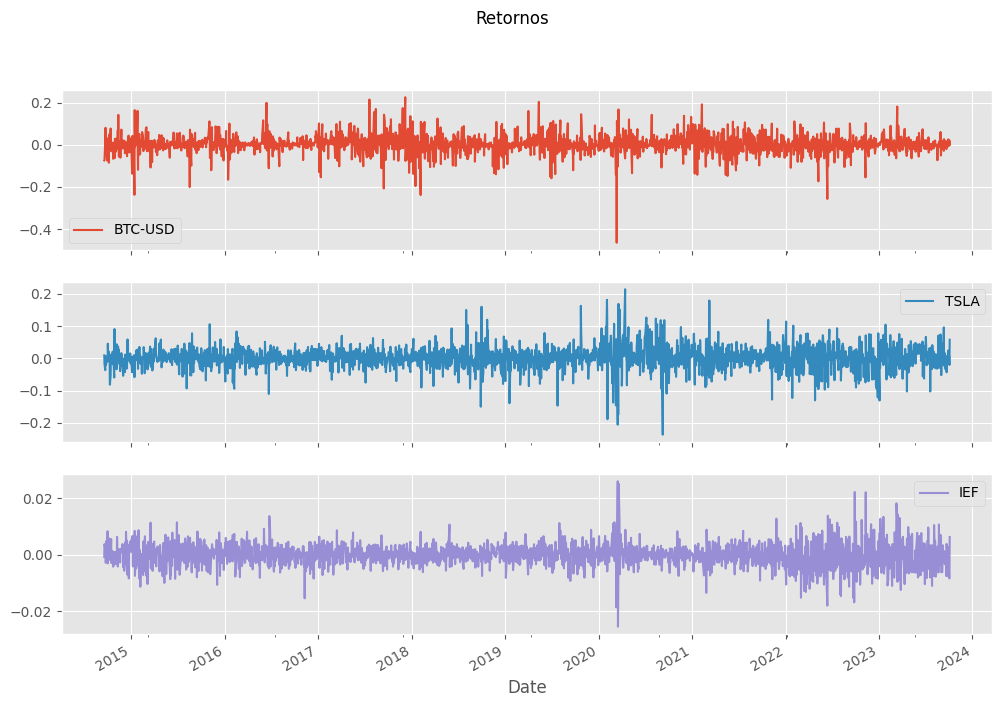

In [16]:
rte_close_df.plot(subplots=True, figsize=(12, 8), title='Retornos')

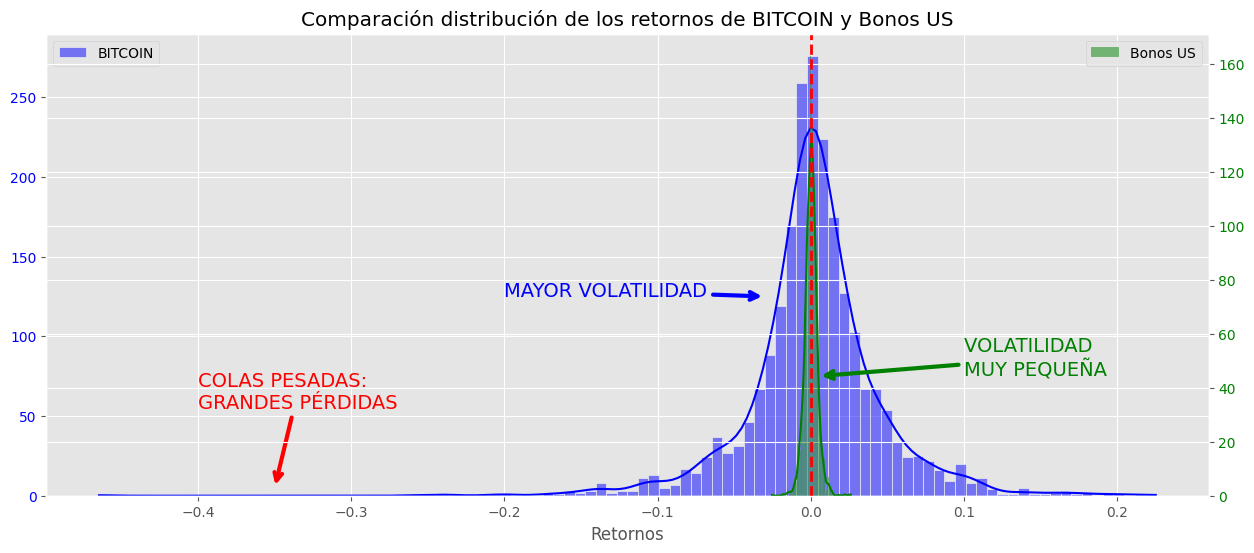

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=ret_close_df, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=ret_close_df, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()

In [21]:
# Definir la media y la desviación estándar
media = ret_close_df['BTC-USD'].mean()
std = ret_close_df['BTC-USD'].std()

# Establecer la semilla (seed)
np.random.seed(3)  # Puedes usar cualquier número como semilla

# Generar una serie de números con distribución normal
data_norm = np.random.normal(media, std, 100000)  # 100000 números aleatorios

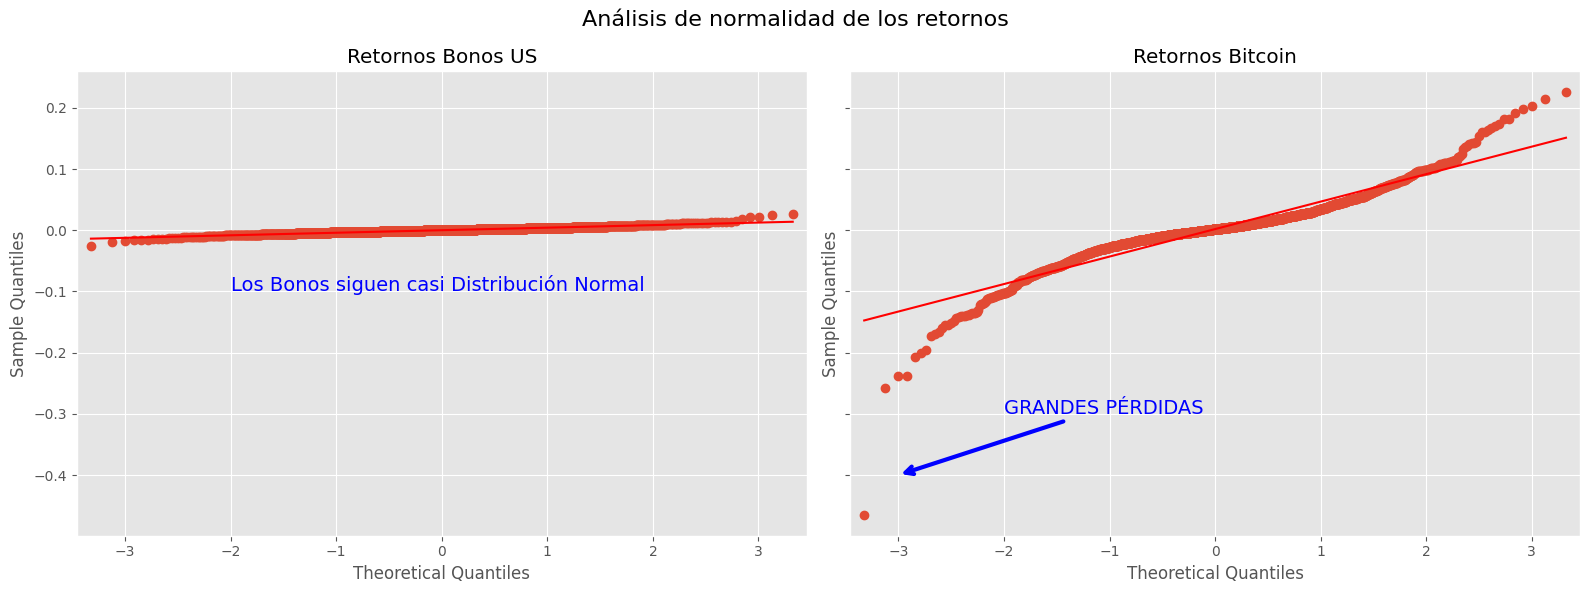

In [40]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey='row')

# Graficar el primer histograma 
sm.qqplot(ret_close_df['IEF'], line='s', ax=axs[0])
axs[0].set_title('Retornos Bonos US')
axs[0].text(-2, -0.1, "Los Bonos siguen casi Distribución Normal", fontsize=14, color='blue')

# Graficar el segundo histograma 
sm.qqplot(ret_close_df['BTC-USD'], line='s', ax=axs[1])
axs[1].set_title('Retornos Bitcoin')

# # Dibuja una flecha utilizando annotate
axs[1].annotate('GRANDES PÉRDIDAS', xy=(-3, -0.4), xytext=(-2, -0.3),
             arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
             fontsize=14, color='blue')

fig.suptitle('Análisis de normalidad de los retornos', fontsize=16)
# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Vamos a aplicar de nuevo el test de [Kolmogorov-Smirnov](https://es.wikipedia.org/wiki/Prueba_de_Kolmog%C3%B3rov-Smirnov) para comprobar si Bitcoin sigue una distribución normal (ya hemos visto que no).

In [41]:
# Prueba de Kolmogorov-Smirnov
stat, p = stats.kstest(ret_close_df['BTC-USD'], 'norm')

# Compara el valor p con un nivel de significancia (por ejemplo, 0.05)
alpha = 0.05
if p > alpha:
    print(f"El resultado es de {p:.4f}, lo que quiere decir que los datos SÍ SIGUEN una distribución normal (no podemos rechazar la hipótesis nula)")
else:
    print(f"El resultado es de {p:.4f}, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)")

El resultado es de 0.0000, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)


**CONCLUSIÓN: LOS RETORNOS NO SIGUEN UNA DISTRIBUCIÓN NORMAL**

* Las colas de la distribución de los retornos son más pesadas que las de una distribución normal.

* Esto quiere decir que hay más probabilidad de que ocurran eventos extremos (tanto positivos como negativos) de lo que cabría esperar si los retornos siguieran una distribución normal.

* Por lo general, la cola izquierda es más pesada que la derecha, lo que quiere decir que hay más probabilidad de que ocurran eventos negativos extremos que positivos extremos.

**CONSECUENCIA: PARA ESTIMAR ADECUADAMENTE EL RIESGO, LA VOLATILIDAD NO ES SUFICIENTE**

Necesitamos más información para caracterizar los activos. Necesitamos conceptos como:

* Asimetría y curtosis

* VaR

* CVaR

* Ratio de sharpe
  
* Ratio de Infomación
  
* Ratio de Treinor
  
* Ratio de Sortino
  
* Máximo Drawdown
  
* Tiempo de recuperación
  
* Ratio de Calmar
  
* Bull Beta
  
* Bear Beta
